<a href="https://colab.research.google.com/github/Ranjeet-del/Hospital-Readmission-Predictor/blob/main/LEARNATHON_4_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd


In [ ]:
# Path to your CSV
df = pd.read_csv("/content/healthcare_dataset.csv")  # replace with actual file name
print(df.head())  # show first 5 rows
print(df.info())  # show structure
print(df.isnull().sum())  # check missing values

            Name  Age  Gender Blood Type Medical Condition Date of Admission  \
0  Bobby JacksOn   30    Male         B-            Cancer        2024-01-31   
1   LesLie TErRy   62    Male         A+           Obesity        2019-08-20   
2    DaNnY sMitH   76  Female         A-           Obesity        2022-09-22   
3   andrEw waTtS   28  Female         O+          Diabetes        2020-11-18   
4  adrIENNE bEll   43  Female        AB+            Cancer        2022-09-19   

             Doctor                    Hospital Insurance Provider  \
0     Matthew Smith             Sons and Miller         Blue Cross   
1   Samantha Davies                     Kim Inc           Medicare   
2  Tiffany Mitchell                    Cook PLC              Aetna   
3       Kevin Wells  Hernandez Rogers and Vang,           Medicare   
4    Kathleen Hanna                 White-White              Aetna   

   Billing Amount  Room Number Admission Type Discharge Date   Medication  \
0    18856.281306    

In [ ]:
print(df.head())
print(df.columns)


            Name  Age  Gender Blood Type Medical Condition Date of Admission  \
0  Bobby JacksOn   30    Male         B-            Cancer        2024-01-31   
1   LesLie TErRy   62    Male         A+           Obesity        2019-08-20   
2    DaNnY sMitH   76  Female         A-           Obesity        2022-09-22   
3   andrEw waTtS   28  Female         O+          Diabetes        2020-11-18   
4  adrIENNE bEll   43  Female        AB+            Cancer        2022-09-19   

             Doctor                    Hospital Insurance Provider  \
0     Matthew Smith             Sons and Miller         Blue Cross   
1   Samantha Davies                     Kim Inc           Medicare   
2  Tiffany Mitchell                    Cook PLC              Aetna   
3       Kevin Wells  Hernandez Rogers and Vang,           Medicare   
4    Kathleen Hanna                 White-White              Aetna   

   Billing Amount  Room Number Admission Type Discharge Date   Medication  \
0    18856.281306    

In [ ]:
# Drop rows with too many missing values
df = df.dropna()

# Convert categorical columns to numeric
df = pd.get_dummies(df, drop_first=True)

# Check again
print(df.head())


   Age  Billing Amount  Room Number  Name_AARON HicKS  Name_AARON bAldWIN Jr.  \
0   30    18856.281306          328             False                   False   
1   62    33643.327287          265             False                   False   
2   76    27955.096079          205             False                   False   
3   28    37909.782410          450             False                   False   
4   43    14238.317814          458             False                   False   

   Name_AARON hAWkIns  Name_AAROn HaRt  Name_AAROn wiLsON  Name_AARoN FOSTer  \
0               False            False              False              False   
1               False            False              False              False   
2               False            False              False              False   
3               False            False              False              False   
4               False            False              False              False   

   Name_AARoN HOPkINs  ...  Disc

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [ ]:


# Target
y = df['Room Number']
print(y.head())

# Feature(s) – must be 2D, so use double brackets
X = df[['Age']]

# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Model
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
print(classification_report(y_test, y_pred))


0    328
1    265
2    205
3    450
4    458
Name: Room Number, dtype: int64
              precision    recall  f1-score   support

         101       0.00      0.00      0.00        32
         102       0.00      0.00      0.00        30
         103       0.00      0.00      0.00        28
         104       0.00      0.00      0.00        34
         105       0.00      0.00      0.00        24
         106       0.00      0.00      0.00        27
         107       0.00      0.00      0.00        26
         108       0.00      0.00      0.00        32
         109       0.00      0.00      0.00        27
         110       0.00      0.00      0.00        32
         111       0.00      0.00      0.00        24
         112       0.00      0.00      0.00        37
         113       0.00      0.00      0.00        33
         114       0.00      0.00      0.00        23
         115       0.00      0.00      0.00        22
         116       0.00      0.00      0.00        25
    

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


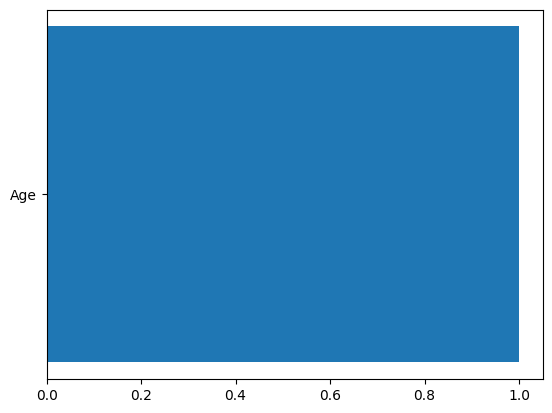

In [ ]:
import matplotlib.pyplot as plt

importances = model.feature_importances_
feat_names = X.columns

plt.barh(feat_names, importances)
plt.show()


In [ ]:
# ======================================
# DATA PREPROCESSING + MODELING
# Dataset columns: ['Name','Age','Gender','Blood Type','Medical Condition','Date of Admission','Doctor','Hospital','Insurance Provider','Billing Amount','Room Number','Admission Type','Discharge Date','Medication','Test Results']
# ======================================

import pandas as pd
import numpy as np

# Load dataset
# (replace with your actual CSV file name)
df = pd.read_csv("/content/healthcare_dataset.csv")
print("===== Raw Data =====")
print(df.head())
print("Shape:", df.shape)

# ======================================
# STEP 1: Handle missing values
# ======================================
# Check missing values
print("\nMissing values per column:")
print(df.isnull().sum())

# Simple strategy: fill numeric with median, categorical with mode
for col in df.columns:
    if df[col].dtype == 'object':
        df[col].fillna(df[col].mode()[0], inplace=True)
    else:
        df[col].fillna(df[col].median(), inplace=True)

print("\nAfter filling missing values:")
print(df.isnull().sum())

# ======================================
# STEP 2: Drop irrelevant columns
# ======================================
# Drop columns like Name, Date of Admission, Discharge Date which are identifiers or not useful for prediction
cols_to_drop = ['Name', 'Date of Admission', 'Discharge Date']
for col in cols_to_drop:
    if col in df.columns:
        df.drop(col, axis=1, inplace=True)

print("\nColumns after dropping irrelevant ones:")
print(df.columns.tolist())

# ======================================
# STEP 3: Encode categorical variables
# ======================================
# Identify categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
print("Categorical columns:", categorical_cols)

# Convert categorical variables to one-hot encoding
X_full = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

print("\nAfter encoding categorical variables:")
print(X_full.head())
print("New shape:", X_full.shape)

# ======================================
# STEP 4: Prepare target and features
# ======================================
# For demonstration, use 'Hospital' as target (before encoding)
y = df['Hospital']
# Remove original target column from features (and any encoded variants that refer to Hospital)
X = df.drop('Hospital', axis=1)
X = pd.get_dummies(X, drop_first=True)

print("\nFinal features shape:", X.shape)
print("Target sample:")
print(y.head())

# ======================================
# Data is now preprocessed and ready for modeling
# ======================================

===== Raw Data =====
            Name  Age  Gender Blood Type Medical Condition Date of Admission  \
0  Bobby JacksOn   30    Male         B-            Cancer        2024-01-31   
1   LesLie TErRy   62    Male         A+           Obesity        2019-08-20   
2    DaNnY sMitH   76  Female         A-           Obesity        2022-09-22   
3   andrEw waTtS   28  Female         O+          Diabetes        2020-11-18   
4  adrIENNE bEll   43  Female        AB+            Cancer        2022-09-19   

             Doctor                    Hospital Insurance Provider  \
0     Matthew Smith             Sons and Miller         Blue Cross   
1   Samantha Davies                     Kim Inc           Medicare   
2  Tiffany Mitchell                    Cook PLC              Aetna   
3       Kevin Wells  Hernandez Rogers and Vang,           Medicare   
4    Kathleen Hanna                 White-White              Aetna   

   Billing Amount  Room Number Admission Type Discharge Date   Medication  \


/tmp/ipython-input-8-790870712.py:26: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)
/tmp/ipython-input-8-790870712.py:28: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try


After filling missing values:
Name                  0
Age                   0
Gender                0
Blood Type            0
Medical Condition     0
Date of Admission     0
Doctor                0
Hospital              0
Insurance Provider    0
Billing Amount        0
Room Number           0
Admission Type        0
Discharge Date        0
Medication            0
Test Results          0
dtype: int64

Columns after dropping irrelevant ones:
['Age', 'Gender', 'Blood Type', 'Medical Condition', 'Doctor', 'Hospital', 'Insurance Provider', 'Billing Amount', 'Room Number', 'Admission Type', 'Medication', 'Test Results']
Categorical columns: ['Gender', 'Blood Type', 'Medical Condition', 'Doctor', 'Hospital', 'Insurance Provider', 'Admission Type', 'Medication', 'Test Results']

After encoding categorical variables:
   Age  Billing Amount  Room Number  Gender_Male  Blood Type_A-  \
0   30    18856.281306          328         True          False   
1   62    33643.327287          265         T

            Name  Age  Gender Blood Type Medical Condition Date of Admission  \
0  Bobby JacksOn   30    Male         B-            Cancer        2024-01-31   
1   LesLie TErRy   62    Male         A+           Obesity        2019-08-20   
2    DaNnY sMitH   76  Female         A-           Obesity        2022-09-22   
3   andrEw waTtS   28  Female         O+          Diabetes        2020-11-18   
4  adrIENNE bEll   43  Female        AB+            Cancer        2022-09-19   

             Doctor                    Hospital Insurance Provider  \
0     Matthew Smith             Sons and Miller         Blue Cross   
1   Samantha Davies                     Kim Inc           Medicare   
2  Tiffany Mitchell                    Cook PLC              Aetna   
3       Kevin Wells  Hernandez Rogers and Vang,           Medicare   
4    Kathleen Hanna                 White-White              Aetna   

   Billing Amount  Room Number Admission Type Discharge Date   Medication  \
0    18856.281306    

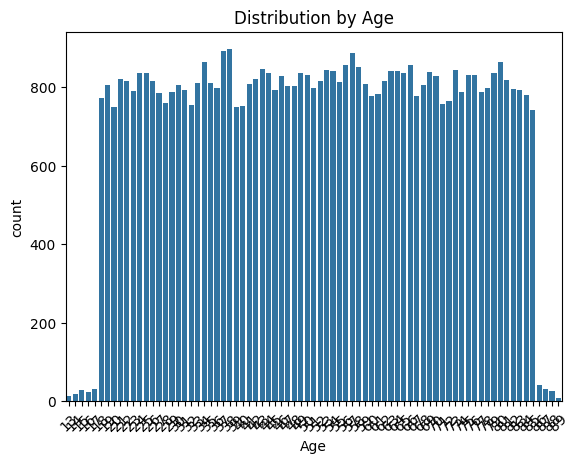

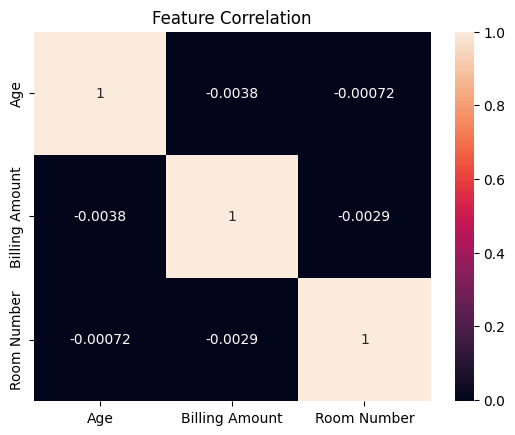

[[1711 1033 1010]
 [1078 1569  970]
 [1103 1034 1592]]
              precision    recall  f1-score   support

           0       0.44      0.46      0.45      3754
           1       0.43      0.43      0.43      3617
           2       0.45      0.43      0.44      3729

    accuracy                           0.44     11100
   macro avg       0.44      0.44      0.44     11100
weighted avg       0.44      0.44      0.44     11100

[[1738 1012 1004]
 [1097 1594  926]
 [1072 1049 1608]]
              precision    recall  f1-score   support

           0       0.44      0.46      0.45      3754
           1       0.44      0.44      0.44      3617
           2       0.45      0.43      0.44      3729

    accuracy                           0.45     11100
   macro avg       0.45      0.44      0.44     11100
weighted avg       0.45      0.45      0.44     11100



In [ ]:
import pandas as pd

# Load the CSV file
df = pd.read_csv('/content/healthcare_dataset.csv')

# Preview the data
print(df.head())
# Check for missing values
print(df.isnull().sum())

# Drop or fill missing values
df = df.dropna()  # Or use df.fillna(method='ffill') for filling

# Check column types and unique values
print(df.dtypes)
# Check for missing values
print(df.isnull().sum())

# Drop or fill missing values
df = df.dropna()  # Or use df.fillna(method='ffill') for filling

# Check column types and unique values
print(df.dtypes)
import seaborn as sns
import matplotlib.pyplot as plt

# Plot readmission by age
sns.countplot(data=df, x='Age')
plt.xticks(rotation=45)
plt.title('Distribution by Age')
plt.show()

# Correlation heatmap for numeric features
sns.heatmap(df.corr(numeric_only=True), annot=True)
plt.title('Feature Correlation')
plt.show()
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Drop columns that won't help
df = df.drop([], axis=1)

# Encode all object type columns
le = LabelEncoder()
for col in df.select_dtypes(include=['object']).columns:
    df[col] = le.fit_transform(df[col])

# Split into features and target
# Based on the previous steps, it seems like 'Test Results' might be the target variable.
# If this is not the case, please let me know which column you want to use as the target.
X = df.drop('Test Results', axis=1)
y = df['Test Results']


# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Train the model
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Train the model
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

In [ ]:
target_col = 'Test Results'
X = df.drop(target_col, axis=1)
y = df[target_col]


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=200, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(n_estimators=200, random_state=42)

In [ ]:
y_pred = model.predict(X_test)


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[1756  950 1020]
 [1102 1566 1003]
 [1069 1031 1603]]
              precision    recall  f1-score   support

           0       0.45      0.47      0.46      3726
           1       0.44      0.43      0.43      3671
           2       0.44      0.43      0.44      3703

    accuracy                           0.44     11100
   macro avg       0.44      0.44      0.44     11100
weighted avg       0.44      0.44      0.44     11100



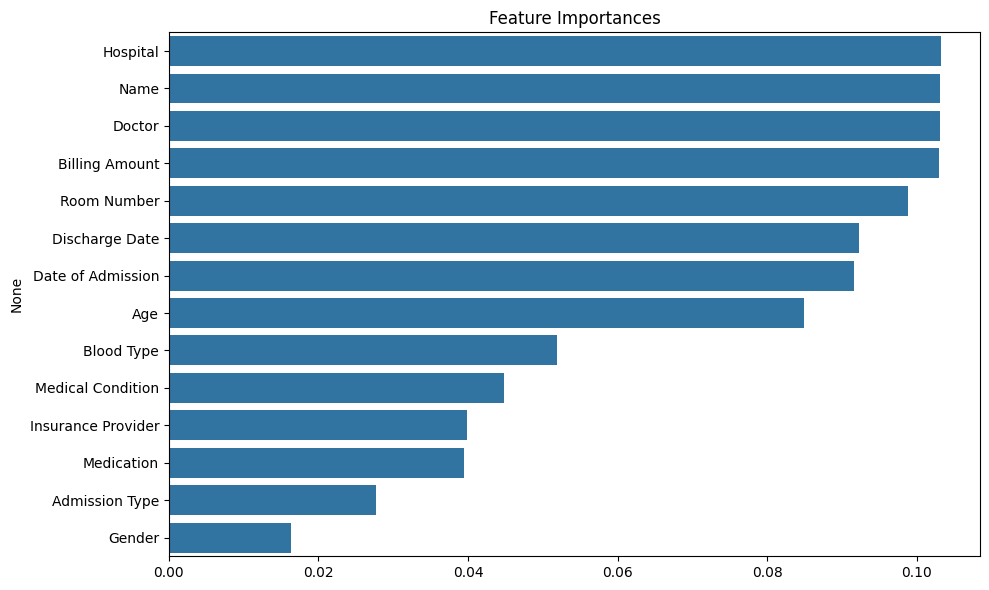

In [ ]:
importances = model.feature_importances_
features = X.columns
indices = importances.argsort()[::-1]

plt.figure(figsize=(10, 6))
sns.barplot(x=importances[indices], y=features[indices])
plt.title('Feature Importances')
plt.tight_layout()
plt.show()

In [ ]:
import joblib
joblib.dump(model, 'trained_model.pkl')


['trained_model.pkl']

In [ ]:
model = joblib.load('trained_model.pkl')


In [ ]:
y_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1756  950 1020]
 [1102 1566 1003]
 [1069 1031 1603]]
              precision    recall  f1-score   support

           0       0.45      0.47      0.46      3726
           1       0.44      0.43      0.43      3671
           2       0.44      0.43      0.44      3703

    accuracy                           0.44     11100
   macro avg       0.44      0.44      0.44     11100
weighted avg       0.44      0.44      0.44     11100

